# Exploratory data anaysis

In [67]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
import math


In [33]:
df=pd.read_csv('titanic.csv')

In [34]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
df.isnull().sum()            # to find the nan values in  a dataframe

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
# getting an overview of the nan values in the dataframe using heatmap

<AxesSubplot:>

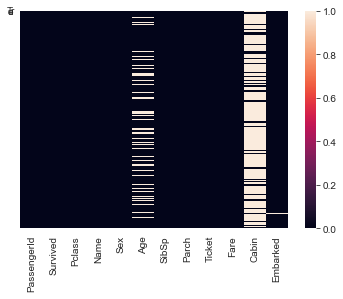

In [37]:
sns.heatmap(df.isnull(),yticklabels='True',)

<AxesSubplot:xlabel='Survived', ylabel='count'>

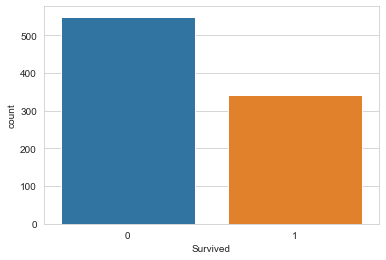

In [38]:
sns.countplot(data=df,x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

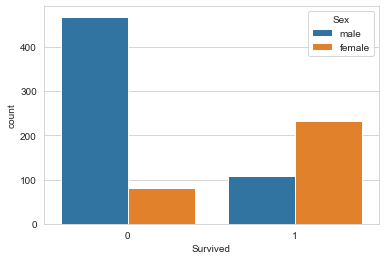

In [39]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Survived',hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

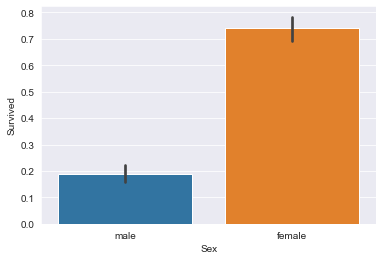

In [40]:
sns.set_style('darkgrid')
sns.barplot(data=df,y='Survived',x='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

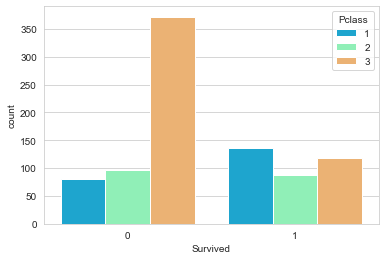

In [41]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Survived',hue='Pclass',palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

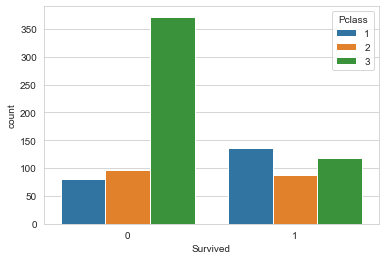

In [42]:
sns.set_style('whitegrid')
sns.countplot(data=df,x='Survived',hue='Pclass')

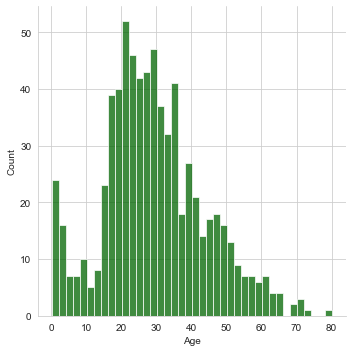

In [43]:
sns.displot(df['Age'].dropna(),kde=False ,color='darkgreen',bins=40)

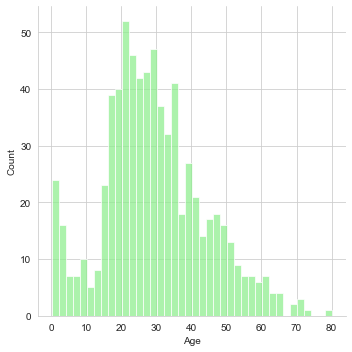

In [44]:
sns.displot(df['Age'],kde=False,color='lightgreen',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

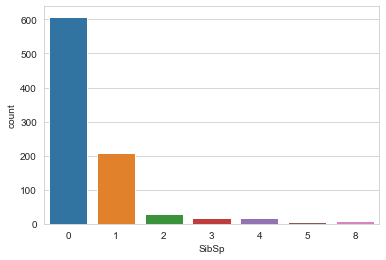

In [45]:
sns.countplot(data=df,x='SibSp')

In [46]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


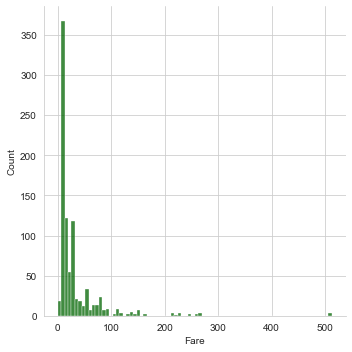

In [47]:
sns.displot(df['Fare'],kde=False,bins=80,color='darkgreen')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

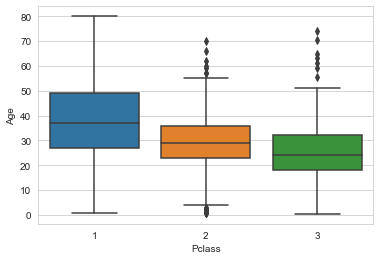

In [48]:
sns.boxplot(x='Pclass',y='Age',data=df)         # to get a relationship between passenger class and age
                                                # because we have to fill the nan values in the age column

In [49]:
df['Age'].mean()

29.69911764705882

In [50]:
np.mean(df['Age'])

29.69911764705882

In [51]:
np.average(df['Fare'])

32.204207968574636

In [52]:
# filling nan value with some data

In [53]:
def fill_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age


In [54]:
df['Age']=df[['Age','Pclass']].apply(fill_age,axis=1)

<AxesSubplot:>

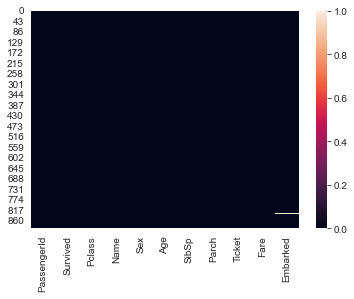

In [57]:
sns.heatmap(df.isnull())

In [56]:
df.drop('Cabin',axis=1,inplace=True)

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [58]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)

In [59]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1


In [68]:
tita=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [69]:
tita.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# train test  data

In [72]:
x= tita.drop('Survived',axis=1)
y= tita['Survived']

In [76]:
 from sklearn.model_selection import train_test_split


In [78]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [80]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression(max_iter=200)
logmodel.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [81]:
prediction = logmodel.predict(x_test)

In [82]:
from sklearn.metrics import classification_report

In [83]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.84      0.81       153\n           1       0.77      0.70      0.73       115\n\n    accuracy                           0.78       268\n   macro avg       0.78      0.77      0.77       268\nweighted avg       0.78      0.78      0.78       268\n'

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_test,prediction)

array([[129,  24],
       [ 35,  80]], dtype=int64)